In [38]:
# In[ ]: Importação dos pacotes necessários

import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
from math import exp, factorial
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [39]:
# In[ ]:
##############################################################################
#                 A DISTRIBUIÇÃO POISSON - PARTE CONCEITUAL                  #
##############################################################################

#Estabelecendo uma função da distribuição Poisson para determinados valores
#de lambda
def poisson_lambda(lmbda,m):
    return (exp(-lmbda) * lmbda ** m) / factorial(m)

In [41]:
# In[ ]: Plotagem das funções estabelecidas para diferentes valores de lambda

m = np.arange(0,21)

lmbda_1 = []
lmbda_2 = []
lmbda_4 = []

for item in m:
    # Estabelecendo a distribuição com lambda = 1
    lmbda_1.append(poisson_lambda(1,item))
    # Estabelecendo a distribuição com lambda = 2
    lmbda_2.append(poisson_lambda(2,item))
    # Estabelecendo a distribuição com lambda = 4
    lmbda_4.append(poisson_lambda(4,item))

#Criando um dataframe com m variando de 0 a 20 e diferentes valores de lambda
df_lambda = pd.DataFrame({'m':m,
                          'lambda_1':lmbda_1,
                          'lambda_2':lmbda_2,
                          'lambda_4':lmbda_4})
df_lambda

,m,lambda_1,lambda_2,lambda_4
0,0,3.678794e-01,1.353353e-01,1.831564e-02
1,1,3.678794e-01,2.706706e-01,7.326256e-02
2,2,1.839397e-01,2.706706e-01,1.465251e-01
3,3,6.131324e-02,1.804470e-01,1.953668e-01
4,4,1.532831e-02,9.022352e-02,1.953668e-01
5,5,3.065662e-03,3.608941e-02,1.562935e-01
6,6,5.109437e-04,1.202980e-02,1.041956e-01
7,7,7.299195e-05,3.437087e-03,5.954036e-02
8,8,9.123994e-06,8.592716e-04,2.977018e-02
9,9,1.013777e-06,1.909493e-04,1.323119e-02


<function matplotlib.pyplot.show(close=None, block=None)>

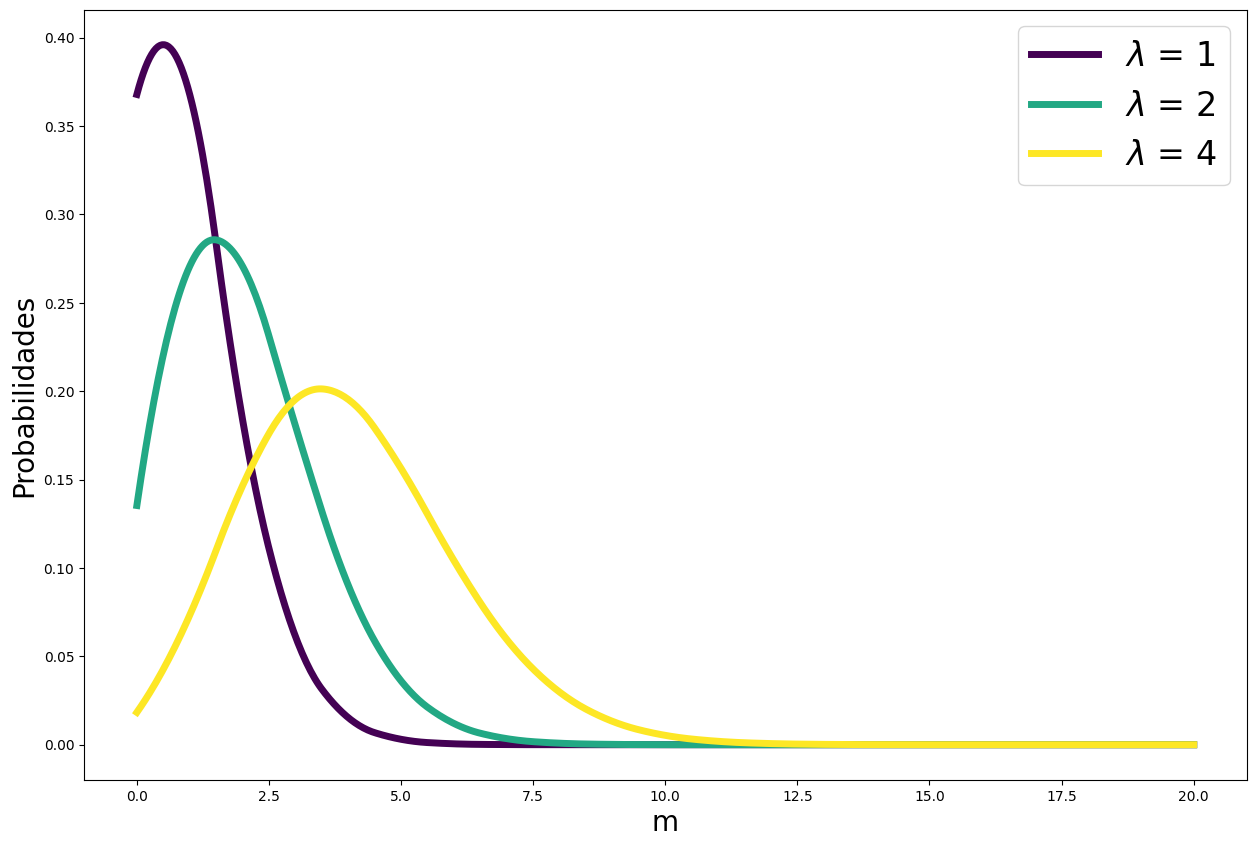

In [42]:
# In[ ]: Plotagem propriamente dita

from scipy.interpolate import interp1d

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, lambda_1 = smooth_line_plot(df_lambda.m, df_lambda.lambda_1)
x_new, lambda_2 = smooth_line_plot(df_lambda.m, df_lambda.lambda_2)
x_new, lambda_4 = smooth_line_plot(df_lambda.m, df_lambda.lambda_4)

plt.figure(figsize=(15,10))
plt.plot(x_new,lambda_1, linewidth=5, color='#440154FF')
plt.plot(x_new,lambda_2, linewidth=5, color='#22A884FF')
plt.plot(x_new,lambda_4, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20)
plt.ylabel('Probabilidades', fontsize=20)
plt.legend([r'$\lambda$ = 1',r'$\lambda$ = 2',r'$\lambda$ = 4'], fontsize=24)
plt.show


In [43]:
# In[6]:
##############################################################################
#                      REGRESSÃO PARA DADOS DE CONTAGEM                      #
#                  CARREGAMENTO DA BASE DE DADOS corruption                  #
##############################################################################

#Fisman, R.; Miguel, E. Corruption, Norms, and Legal Enforcement:
#Evidence from Diplomatic Parking Tickets.
#Journal of Political Economy, v. 15, n. 6, p. 1020-1048, 2007.
#https://www.journals.uchicago.edu/doi/abs/10.1086/527495

df_corruption = pd.read_csv('corruption.csv', delimiter=',')
df_corruption

#Características das variáveis do dataset
df_corruption.info()

#Estatísticas univariadas
df_corruption.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     298 non-null    object 
 1   code        298 non-null    object 
 2   violations  298 non-null    int64  
 3   staff       298 non-null    int64  
 4   post        298 non-null    object 
 5   corruption  298 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.1+ KB


,violations,staff,corruption
count,298.000000,298.000000,298.000000
mean,6.496644,11.805369,0.013641
std,18.210377,11.079558,1.012474
min,0.000000,2.000000,-2.582988
25%,0.000000,6.000000,-0.415147
50%,0.000000,9.000000,0.326959
75%,3.000000,14.000000,0.720250
max,167.000000,86.000000,1.582807


In [44]:
# In[ ]: Tabela de frequências da variável dependente 'violations'
#Função 'values_counts' do pacote 'pandas' sem e com normalização
#para gerar as contagens e os percentuais, respectivamente
contagem = df_corruption['violations'].value_counts(dropna=False)
percent = df_corruption['violations'].value_counts(dropna=False, normalize=True)
pd.concat([contagem, percent], axis=1, keys=['contagem', '%'], sort=True)

,contagem,%
violations,,
0,156,0.523490
1,35,0.117450
2,16,0.053691
3,17,0.057047
4,5,0.016779
5,10,0.033557
6,3,0.010067
7,4,0.013423
8,3,0.010067


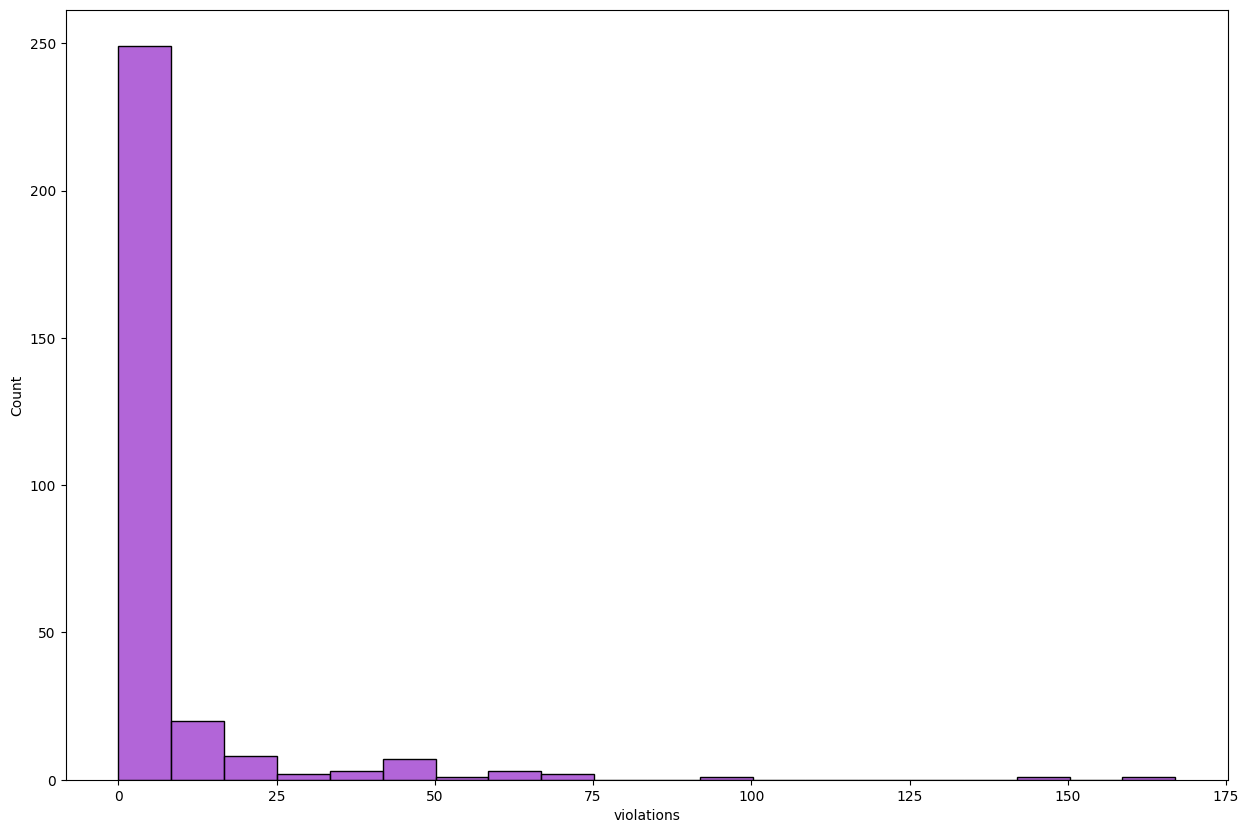

In [45]:
# In[ ]: Histograma da variável dependente 'violations'

plt.figure(figsize=(15,10))
sns.histplot(data=df_corruption, x="violations", bins=20, color='darkorchid')
plt.show()

In [46]:
# In[ ]: Diagnóstico preliminar para observação de eventual igualdade entre a
#média e a variância da variável dependente 'violations'

pd.DataFrame({'Média':[df_corruption.violations.mean()],
              'Variância':[df_corruption.violations.var()]})


,Média,Variância
0,6.496644,331.617834


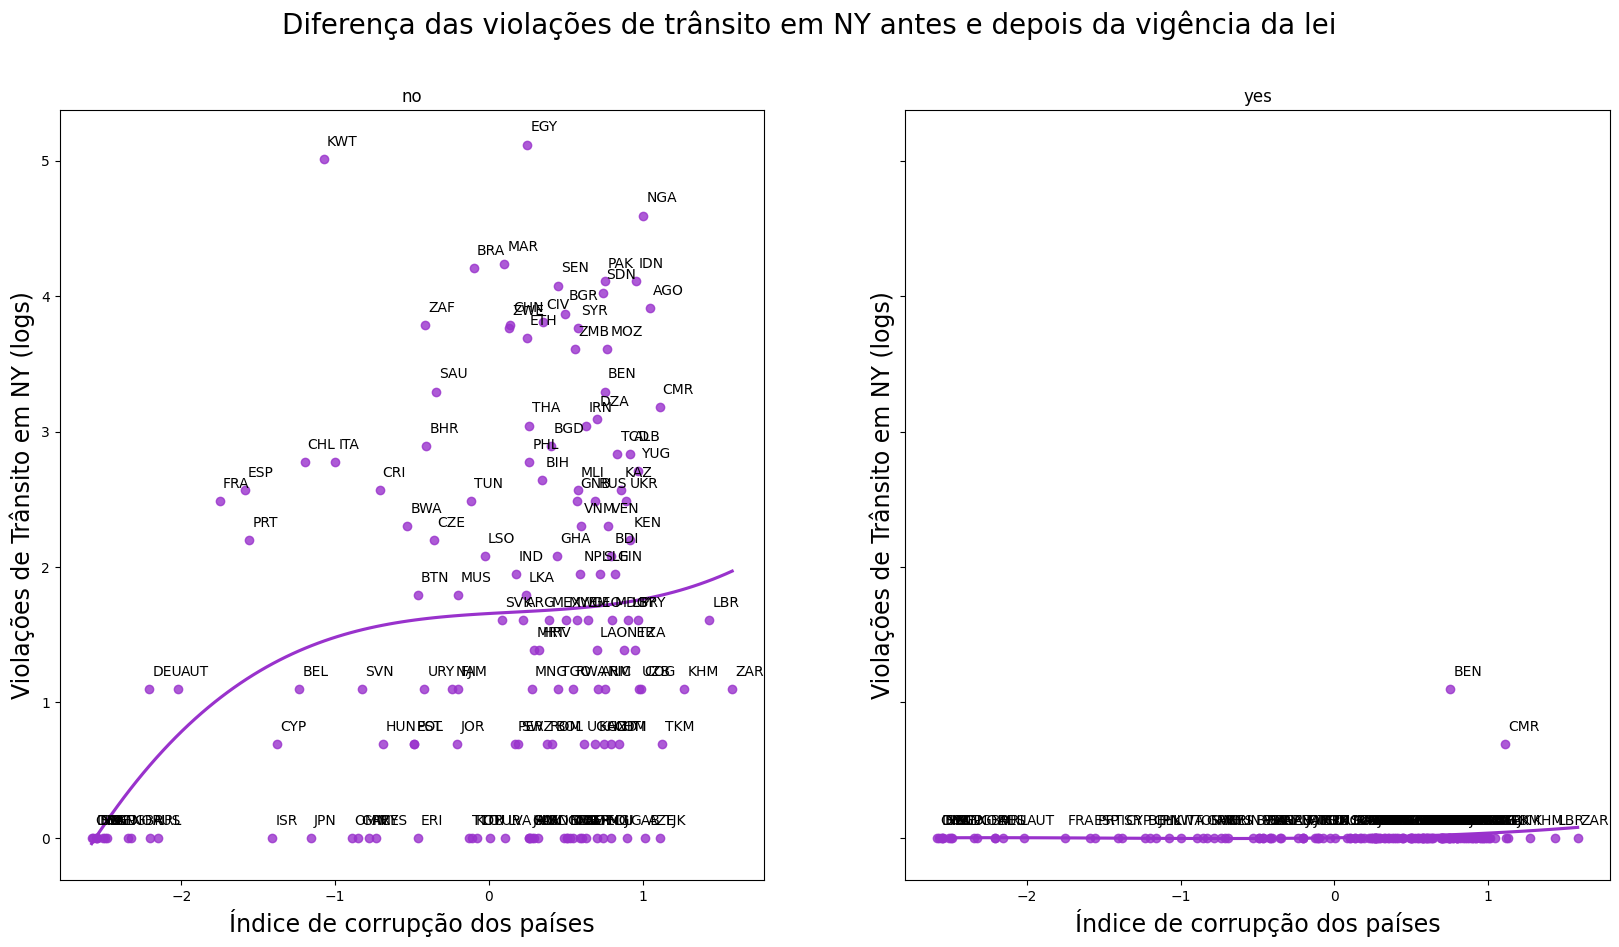

In [47]:
# In[ ]: Comportamento das variáveis 'corruption' e 'violations' antes e
#depois do início da vigência da lei

fig, axs = plt.subplots(ncols=2, figsize=(20,10), sharey=True)

fig.suptitle('Diferença das violações de trânsito em NY antes e depois da vigência da lei',
             fontsize = 20)

post = ['no','yes']

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.1, str(point['val']))

for i, v in enumerate(post):
    df = df_corruption[df_corruption.post==v]
    df['violations'] = np.log(df.violations)
    df.loc[df['violations']==np.inf, 'violations'] = 0
    df.loc[df['violations']==-np.inf, 'violations'] = 0
    sns.regplot(data=df, x='corruption', y='violations',order=3, ax=axs[i],
                ci=False, color='darkorchid')
    axs[i].set_title(v)
    axs[i].set_ylabel("Violações de Trânsito em NY (logs)", fontsize = 17)
    axs[i].set_xlabel("Índice de corrupção dos países", fontsize = 17)
    label_point(df.corruption, df.violations, df.code, axs[i])  

plt.show()

In [48]:
# In[ ]: Estimação do modelo Poisson

#O argumento 'family=sm.families.Poisson()' da função 'smf.glm' define a
#estimação de um modelo Poisson
modelo_poisson = smf.glm(formula='violations ~ staff + post + corruption',
                         data=df_corruption,
                         family=sm.families.Poisson()).fit()

#Parâmetros do modelo
modelo_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Mon, 03 Jul 2023   Deviance:                       3644.0
Time:                        18:58:33   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      0.000       2.152       2.274
post[T.yes]    -4.2968      0.197    -21.762      0.000      -4.684      -3.910
staff           0.0219      0.001     17.807      0.000       0.019       0.024
corruption      0.3418      0.027     12.430      0.000       0.288       0.396
===============================================================================
"""

In [49]:
# In[ ]: Outro modo mais completo de apresentar os outputs do modelo,
#pela função 'summary_col'

summary_col([modelo_poisson],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })


,MODELO
Intercept,2.2127***
,(0.0311)
post[T.yes],-4.2968***
,(0.1974)
staff,0.0219***
,(0.0012)
corruption,0.3418***
,(0.0275)
N,298
Log-lik,-2071.79


In [50]:
# In[ ]: Todas as variáveis preditoras se mostraram estatisticamente
#diferentes de zero, considerando-se um nível de significância de 5%,
#ceteris paribus. Porém, já se pode afirmar que a estimação Poisson é a mais
#adequada?

################################################################################
#            TESTE DE SUPERDISPERSÃO DE CAMERON E TRIVEDI (1990)               #
################################################################################
#CAMERON, A. C.; TRIVEDI, P. K. Regression-based tests for overdispersion in
#the Poisson model. Journal of Econometrics, v. 46, n. 3, p. 347-364, 1990.

#1º Passo: estimar um modelo Poisson;
#2º Passo: criar uma nova variável (Y*) utilizando os fitted values do modelo
#Poisson estimado anteriormente;
#3º Passo: estimar um modelo auxiliar OLS, com a variável Y* como variável
#dependente, os fitted values do modelo Poisson como única variável preditora e 
#sem o intercepto;
#4º Passo: Observar a significância do parâmetro beta.

#Adicionando os fitted values do modelo Poisson (lambda_poisson) ao dataframe:
df_corruption['lambda_poisson'] = modelo_poisson.fittedvalues
df_corruption

#Criando a nova variável Y*:
df_corruption['ystar'] = (((df_corruption['violations']
                            -df_corruption['lambda_poisson'])**2)
                          -df_corruption['violations'])/df_corruption['lambda_poisson']
df_corruption

#Estimando o modelo auxiliar OLS, sem o intercepto:
modelo_auxiliar = smf.ols(formula='ystar ~ 0 + lambda_poisson',
                          data=df_corruption).fit()

#Parâmetros do 'modelo_auxiliar'
modelo_auxiliar.summary()

#Caso o p-value do parâmetro do lambda_poisson seja maior que 0.05,
#verifica-se a existência de equidispersão nos dados.
#Caso contrário, diagnostica-se a existência de superdispersão nos dados, fato
#que favorecerá a estimação de um modelo binomial negativo, como ocorre nesse
#caso.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  ystar   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.022
Method:                 Least Squares   F-statistic:                              7.584
Date:                Mon, 03 Jul 2023   Prob (F-statistic):                     0.00625
Time:                        18:58:50   Log-Likelihood:                         -1952.9
No. Observations:                 298   AIC:                                      3908.
Df Residuals:                     297   BIC:                                      3911.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
lambda_poisson     2.6525      0.963      2.754      0.006       0.757       4.548
==============================================================================
Omnibus:                      607.263   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           446004.649
Skew:                          13.265   Prob(JB):                         0.00
Kurtosis:                     190.659   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# In[ ]: Apenas para fins didáticos, caso considerássemos a estimação Poisson
#como a mais adequada, qual seria a quantidade média esperada de violações
#de trânsito para um país cujo corpo diplomático fosse composto por 23 membros,
#considerando o período anterior à vigência da lei e cujo índice de corrupção
#seja igual a 0.5?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))


0    17.93284
dtype: float64

In [52]:

#Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.244112
dtype: float64

In [53]:
##############################################################################
#            A DISTRIBUIÇÃO BINOMIAL NEGATIVA - PARTE CONCEITUAL             #
##############################################################################

#Estabelecendo uma função da distribuição binomial negativa para determinados
#valores de theta e delta
#theta: parâmetro de forma da distribuição Poisson-Gama (binomial negativa)
#delta: parâmetro de taxa de decaimento da distribuição Poisson-Gama

def bneg(theta, delta, m):
    return ((delta ** theta) * (m ** (theta - 1)) * (exp(-m * delta))) / factorial(theta - 1)

In [54]:
#Plotagem das funções estabelecidas para diferentes valores de
#theta e delta

m = np.arange(1,21)

bneg_theta2_delta2 = []
bneg_theta3_delta1 = []
bneg_theta3_delta05 = []

for item in m:
    # Estabelecendo a distribuição binomial negativa com theta=2 e delta=2
    bneg_theta2_delta2.append(bneg(2,2,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=1
    bneg_theta3_delta1.append(bneg(3,1,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=0.5
    bneg_theta3_delta05.append(bneg(3,0.5,item))
   
#Criando um dataframe com m variando de 1 a 20 e diferentes valores de
#theta e delta
df_bneg = pd.DataFrame({'m':m,
                        'bneg_theta2_delta2':bneg_theta2_delta2,
                        'bneg_theta3_delta1':bneg_theta3_delta1,
                        'bneg_theta3_delta05':bneg_theta3_delta05})

df_bneg

,m,bneg_theta2_delta2,bneg_theta3_delta1,bneg_theta3_delta05
0,1,5.413411e-01,1.839397e-01,0.037908
1,2,1.465251e-01,2.706706e-01,0.091970
2,3,2.974503e-02,2.240418e-01,0.125511
3,4,5.367402e-03,1.465251e-01,0.135335
4,5,9.079986e-04,8.422434e-02,0.128258
5,6,1.474611e-04,4.461754e-02,0.112021
6,7,2.328280e-05,2.234111e-02,0.092479
7,8,3.601126e-06,1.073480e-02,0.073263
8,9,5.482793e-07,4.998097e-03,0.056239
9,10,8.244614e-08,2.269996e-03,0.042112


<function matplotlib.pyplot.show(close=None, block=None)>

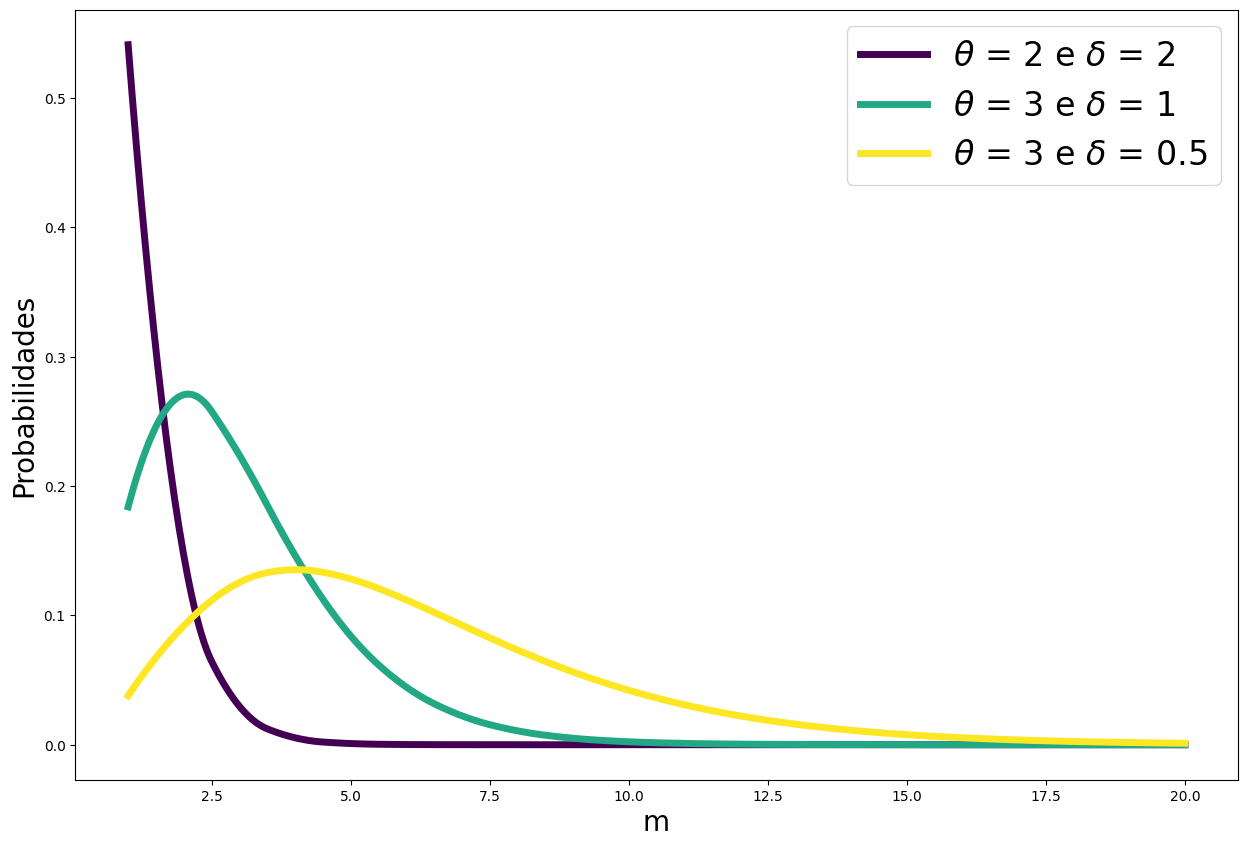

In [55]:
# In[ ]: Plotagem propriamente dita

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, bneg_theta2_delta2 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta2_delta2)
x_new, bneg_theta3_delta1 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta3_delta1)
x_new, bneg_theta3_delta05 = smooth_line_plot(df_bneg.m,
                                              df_bneg.bneg_theta3_delta05)

plt.figure(figsize=(15,10))
plt.plot(x_new,bneg_theta2_delta2, linewidth=5, color='#440154FF')
plt.plot(x_new,bneg_theta3_delta1, linewidth=5, color='#22A884FF')
plt.plot(x_new,bneg_theta3_delta05, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20)
plt.ylabel('Probabilidades', fontsize=20)
plt.legend([r'$\theta$ = 2 e $\delta$ = 2',
            r'$\theta$ = 3 e $\delta$ = 1',
            r'$\theta$ = 3 e $\delta$ = 0.5'],
           fontsize=24)
plt.show

In [56]:
# In[ ]: Estimação do modelo binomial negativo do tipo NB2

#O argumento 'family=sm.families.NegativeBinomial(alpha=2.0963)' da função
#'smf.glm' define a estimação de um modelo binomial negativo do tipo NB2
#com valor de 'fi' ('alpha' no Python) igual a 2.0963. Lembramos que 'fi' é o
#inverso do parâmetro de forma 'theta' da distribuição Poisson-Gama.

modelo_bneg = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption,
                      family=sm.families.NegativeBinomial(alpha=2.0963)).fit()

#Parâmetros do modelo
modelo_bneg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Mon, 03 Jul 2023   Deviance:                       239.13
Time:                        18:59:56   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      0.000       1.630       2.264
post[T.yes]    -4.2746      0.266    -16.071      0.000      -4.796      -3.753
staff           0.0400      0.009      4.497      0.000       0.023       0.057
corruption      0.4527      0.115      3.950      0.000       0.228       0.677
===============================================================================
"""

In [57]:

#Construção de função para a definição do 'alpha' ('fi') ótimo que gera a
#maximização do valor de Log-Likelihood
n_samples = 10000
alphas = np.linspace(0, 10, n_samples)
llf = np.full(n_samples, fill_value=np.nan)
for i, alpha in enumerate(alphas):
    try:
        model = smf.glm(formula = 'violations ~ staff + post + corruption',
                        data=df_corruption,
                        family=sm.families.NegativeBinomial(alpha=alpha)).fit()
    except:
        continue
    llf[i] = model.llf
alpha_ótimo = alphas[np.nanargmax(llf)]
alpha_ótimo

2.0962096209620964

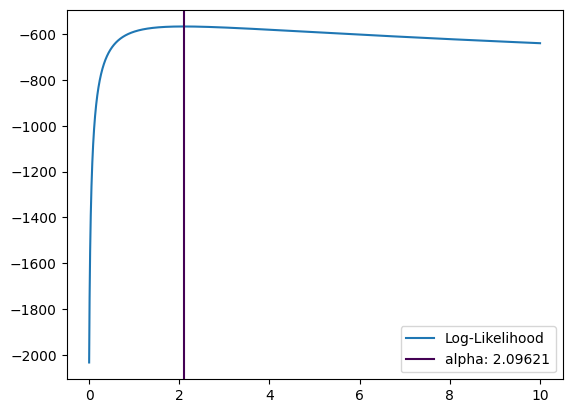

In [58]:
#Plotagem dos resultados
plt.plot(alphas, llf, label='Log-Likelihood')
plt.axvline(x=alpha_ótimo, color='#440154FF',
            label=f'alpha: {alpha_ótimo:0.5f}')
plt.legend()

In [59]:
#Reestimação do modelo binomial negativo com o parâmetro 'alpha_ótimo'
modelo_bneg = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption,
                      family=sm.families.NegativeBinomial(alpha=alpha_ótimo)).fit()

#Parâmetros do modelo
modelo_bneg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Mon, 03 Jul 2023   Deviance:                       239.14
Time:                        19:01:22   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      0.000       1.630       2.264
post[T.yes]    -4.2746      0.266    -16.071      0.000      -4.796      -3.753
staff           0.0400      0.009      4.497      0.000       0.023       0.057
corruption      0.4527      0.115      3.950      0.000       0.228       0.677
===============================================================================
"""

In [60]:
# In[ ]: Comparando os modelos Poisson e binomial negativo

summary_col([modelo_poisson, modelo_bneg], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf),
                'Pseudo-R2':lambda x: "{:.4f}".format(x.pseudo_rsquared()),
        })

,Poisson,BNeg
Intercept,2.2127***,1.9469***
,(0.0311),(0.1616)
post[T.yes],-4.2968***,-4.2746***
,(0.1974),(0.2660)
staff,0.0219***,0.0400***
,(0.0012),(0.0089)
corruption,0.3418***,0.4527***
,(0.0275),(0.1146)
N,298,298
Log-lik,-2071.79,-567.40


In [61]:
# In[ ]: likelihood ratio test para comparação de LL's entre modelos

#Definição da função 'lrtest'
def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1)
    return round(LR_statistic,2), round(p_val,2)

lrtest([modelo_poisson, modelo_bneg])

(3008.79, 0.0)

Text(0.5, 0, 'Log-Likehood')

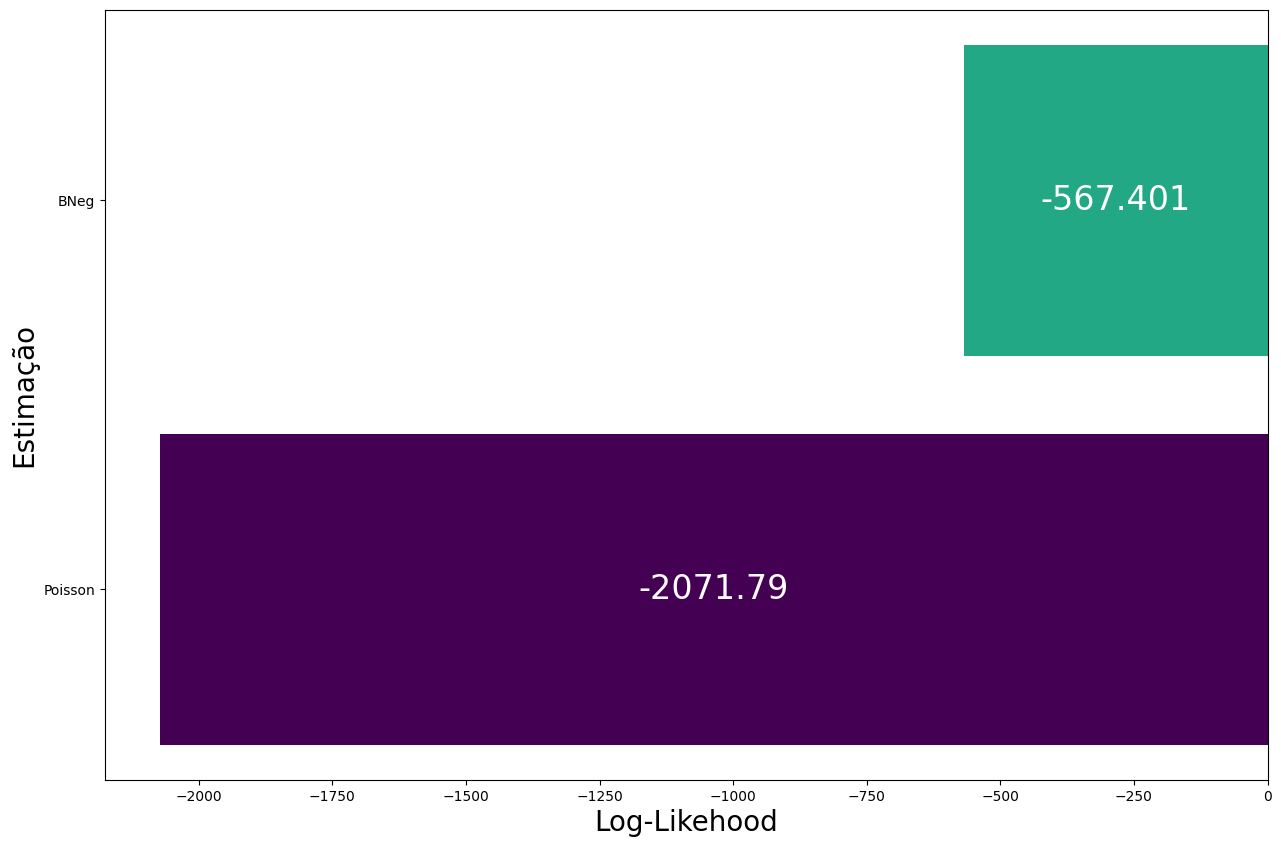

In [62]:
# In[ ]: Gráfico para a comparação dos LL dos modelos Poisson e
#binomial negativo

#Definição do dataframe com os modelos e respectivos LL
df_llf = pd.DataFrame({'modelo':['Poisson','BNeg'],
                      'loglik':[modelo_poisson.llf, modelo_bneg.llf]})
df_llf

#Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['#440154FF', '#22A884FF']

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=24)
ax.set_ylabel("Estimação", fontsize=20)
ax.set_xlabel("Log-Likehood", fontsize=20)

In [63]:
# In[ ]: COMPARAÇÕES ENTRE AS PREVISÕES:
#Qual seria a quantidade média esperada de violações de trânsito para um país
#cujo corpo diplomático seja composto por 23 membros, considerando o período
#anterior à vigência da lei e cujo índice de corrupção seja igual 0.5?

#Modelo Poisson:
modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))



0    17.93284
dtype: float64

In [64]:
#Modelo binomial negativo:
modelo_bneg.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

0    22.05725
dtype: float64

In [65]:
#Qual seria a quantidade média esperada de violações de trânsito para o mesmo
#país, porém agora considerando a vigência da lei?

#Modelo Poisson:
modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.244112
dtype: float64

In [71]:
#Modelo binomial negativo:
modelo_bneg.predict(pd.DataFrame({'staff':[23],
                                     'post':['yes'],
                                     'corruption':[0.5]}))

0    0.306974
dtype: float64

In [69]:
modelo_poisson.fittedvalues

0      15.919915
1       0.216711
2      13.371720
3       0.182023
4       7.477915
         ...    
293     0.243691
294    13.486751
295     0.183589
296    12.994217
297     0.176885
Length: 298, dtype: float64

In [72]:
# In[ ]: Adicionando os fitted values dos modelos estimados até o momento,
#para fins de comparação

df_corruption['fitted_poisson'] = modelo_poisson.fittedvalues
df_corruption['fitted_bneg'] = modelo_bneg.fittedvalues

df_corruption[['country','code','violations','fitted_poisson','fitted_bneg']]

,country,code,violations,fitted_poisson,fitted_bneg
0,Angola,AGO,50,15.919915,16.138591
1,Angola,AGO,1,0.216711,0.224603
2,Albania,ALB,17,13.371720,11.987629
3,Albania,ALB,0,0.182023,0.166834
4,United Arab Emirates,ARE,0,7.477915,5.551769
...,...,...,...,...,...
293,Zaire,ZAR,0,0.243691,0.253810
294,Zambia,ZMB,37,13.486751,12.955687
295,Zambia,ZMB,0,0.183589,0.180306
296,Zimbabwe,ZWE,43,12.994217,13.033499


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x1000 with 0 Axes>

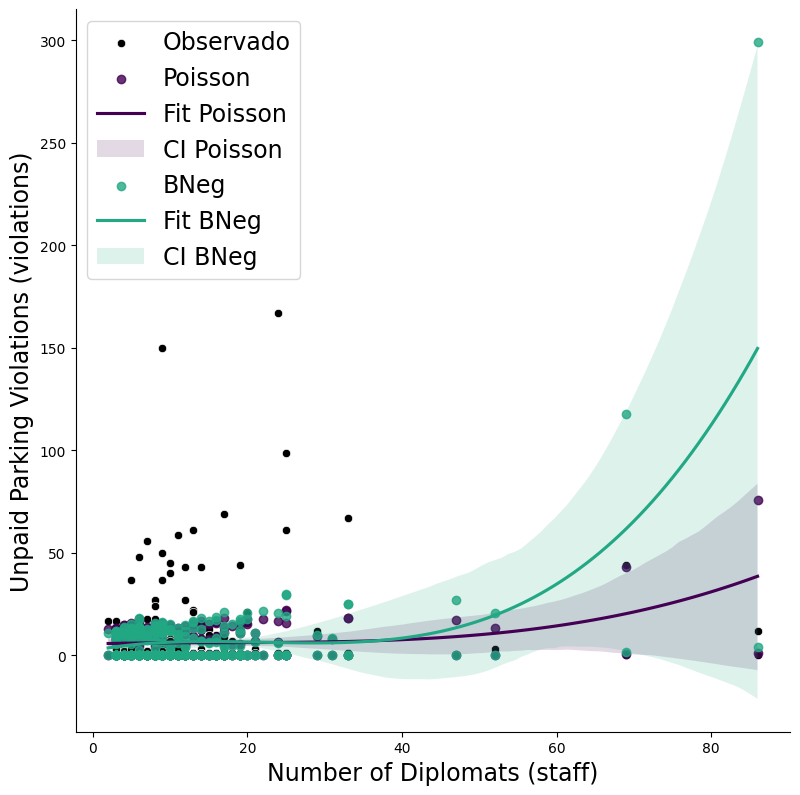

In [73]:
# In[ ]: Fitted values dos modelos Poisson e binomial negativo, considerando,
#para fins didáticos, apenas a variável preditora 'staff':

plt.figure(figsize=(20,10))
sns.relplot(data=df_corruption, x='staff', y='violations', color='black', height=8)
sns.regplot(data=df_corruption, x='staff', y='fitted_poisson', order=3,
            color='#440154FF')
sns.regplot(data=df_corruption, x='staff', y='fitted_bneg', order=3,
            color='#22A884FF')
plt.xlabel('Number of Diplomats (staff)', fontsize=17)
plt.ylabel('Unpaid Parking Violations (violations)', fontsize=17)
plt.legend(['Observado', 'Poisson', 'Fit Poisson', 'CI Poisson',
            'BNeg', 'Fit BNeg', 'CI BNeg'],
           fontsize=17)
plt.show